In [39]:
#Import needed modules
import requests
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Pull JSON data from CitiBike website
r = requests.get('http://www.citibikenyc.com/stations/json')

In [30]:
#Identify data keys
keys=[]
for station in r.json()['stationBeanList']:
    for k in station.keys():
        if k not in dkeys:
            keys.append(k)

In [31]:
#Pull JSON data into Pandas DataFrame
bikedata=pd.io.json.json_normalize(r.json()['stationBeanList'])

In [53]:
bikedata.head()

,altitude,availableBikes,availableDocks,city,id,landMark,lastCommunicationTime,latitude,location,longitude,postalCode,stAddress1,stAddress2,stationName,statusKey,statusValue,testStation,totalDocks
0,,20,19,,72,,2016-07-20 06:31:50 PM,40.767272,,-73.993929,,W 52 St & 11 Ave,,W 52 St & 11 Ave,1,In Service,False,39
1,,17,15,,79,,2016-07-20 06:32:06 PM,40.719116,,-74.006667,,Franklin St & W Broadway,,Franklin St & W Broadway,1,In Service,False,33
2,,16,9,,82,,2016-07-20 06:30:17 PM,40.711174,,-74.000165,,St James Pl & Pearl St,,St James Pl & Pearl St,1,In Service,False,27
3,,47,14,,83,,2016-07-20 06:31:25 PM,40.683826,,-73.976323,,Atlantic Ave & Fort Greene Pl,,Atlantic Ave & Fort Greene Pl,1,In Service,False,62
4,,3,35,,116,,2016-07-20 06:32:29 PM,40.741776,,-74.001497,,W 17 St & 8 Ave,,W 17 St & 8 Ave,1,In Service,False,39


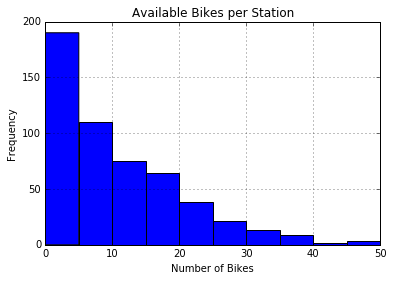

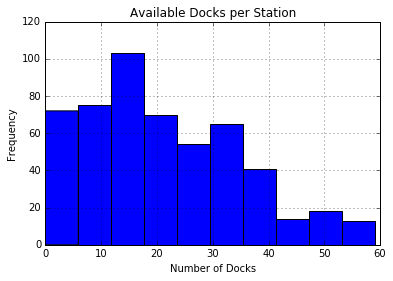

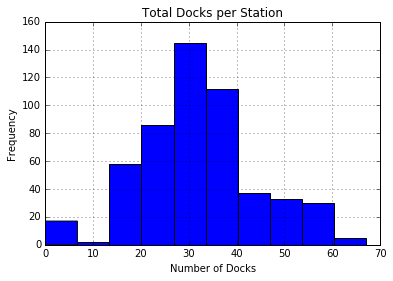

In [43]:
#Probe the dataset
bikedata['availableBikes'].hist()
plt.title('Available Bikes per Station')
plt.xlabel('Number of Bikes')
plt.ylabel('Frequency')

plt.figure()
bikedata['availableDocks'].hist()
plt.title('Available Docks per Station')
plt.xlabel('Number of Docks')
plt.ylabel('Frequency')

plt.figure()
bikedata['totalDocks'].hist()
plt.title('Total Docks per Station')
plt.xlabel('Number of Docks')
plt.ylabel('Frequency')

#Thoughts on histograms
#Each variable has a different distribution which is expected for multiple
#reasons.  There are different constraints and use models depending on the variable
#being considered.  For example, totalDocks appears normally distributed which can
#be explained by a number of reasons.  CitiBike member are most likely not 
#evenly spread across the service area.  Therefore, stations would 
#need different levels of capacity to manage the demand.  
#Another example, availableBikes appears exponentially distributed due to the
#physical lower limit (there can't be negative bikes) and high utilization
#by CitiBike members.  If CitiBike had very low utilization, the distribution
#may match totalDocks more closely.


In [65]:
print('Number of Stations: %i' % bikedata['id'].count())
num_testStat=0
for status in bikedata['testStation']:
    if status == True:
        num_testStat+=1
print('Number of Test Stations: %i' % num_testStat)

Number of Stations: 525
Number of Test Stations: 0
